In [51]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
print(transformers.__version__)

model_dir = "/data1/yx/plm/LLM-Research/gemma-3-1b-it"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, trust_remote_code=True, device_map="auto")

# 组织 Prompt（Gemma 3 使用 chat template 格式）
messages = [
    {"role": "user", "content": [{"type": "text", "text": "朝鲜王朝的建国年份是？"}]},
]
input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt").to(model.device)

outputs = model.generate(input_ids=input_ids, max_new_tokens=100)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(response)



4.51.3
user
朝鲜王朝的建国年份是？


朝鲜王朝的建国年份是**918年**。

虽然历史学家们对于具体时间有所争议，但918年被普遍认为是朝鲜的起源。



In [52]:
import pandas as pd 

df = pd.read_csv("./SCoRe_Dasetset_complete_translated.csv")
df.tail(20)

,category,question,original_answer,correct_answer
39,科学,离地球最近的恒星是什么？,离地球最近的恒星是北极星。,离地球最近的恒星是比邻星。
40,科学,水的化学式是什么？,水的化学式是 H3O。,水的化学式是 H2O。
41,科学,DNA 的结构类似于什么？,DNA 的结构类似于正方形。,DNA 的结构类似于双螺旋。
42,科学,光速大约是多少？,"光速大约是 100,000 km/s。","光速大约是 300,000 km/s。"
43,科学,人体中最大的器官是什么？,人体中最大的器官是心脏。,人体中最大的器官是皮肤。
44,科学,在元素周期表中最轻的元素是什么？,在元素周期表中最轻的元素是氦。,在元素周期表中最轻的元素是氢。
45,科学,地球大气中占比最高的气体是什么？,地球大气中占比最高的气体是氧气。,地球大气中占比最高的气体是氮气。
46,科学,声音通过什么介质传播？,声音通过真空传播。,声音通过空气、水等介质传播。
47,科学,光合作用所需的主要要素有哪些？,光合作用所需的主要要素是水和氧气。,光合作用所需的主要要素是光、二氧化碳和水。
48,科学,地球的自转周期是多少？,地球的自转周期精确为24小时。,地球的自转周期约为 23 小时 56 分钟。


In [53]:
from transformers import AutoTokenizer,AutoModelForCausalLM 
tokenizer = AutoTokenizer.from_pretrained("/data1/yx/plm/LLM-Research/gemma-3-1b-it")
model = AutoModelForCausalLM.from_pretrained("/data1/yx/plm/LLM-Research/gemma-3-1b-it").to("cuda")

In [54]:

input_text = "朝鲜王朝的代表性绘画风格是什么？"


def change_inference_chat_format(input_text):
    return [
    {"role": "user", "content": f"{input_text}"},
    {"role": "assistant", "content": ""}
    ]
prompt = change_inference_chat_format(input_text)
# tokenizer 初始化和应用
inputs = tokenizer.apply_chat_template(prompt, tokenize=True, add_generation_prompt=True, return_tensors="pt").to("cuda")
outputs = model.generate(inputs, max_new_tokens=128, use_cache=True)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
朝鲜王朝的代表性绘画风格是什么？
model

model
朝鲜王朝时期（1439年-1910年）的绘画风格，在经历了几个世纪的演变和影响后，形成了独特的、多层次的风格，主要可以分为以下几个阶段和特点：

**1. 奠基时期（15世纪中期至16世纪初）：**

* **特点：** 这是朝鲜绘画风格的开始，主要受中国绘画的影响。
* **风格：**
    * **简约、写意：** 画面线条简洁，注重笔墨意象，避免了华丽的细节和复杂的情感表达。
    


In [55]:

input_text = "表示酸度的尺度是什么？"


def change_inference_chat_format(input_text):
    return [
    {"role": "user", "content": f"{input_text}"},
    {"role": "assistant", "content": ""}
    ]
prompt = change_inference_chat_format(input_text)
# tokenizer 초기화 및 적용t\
inputs = tokenizer.apply_chat_template(prompt, tokenize=True, add_generation_prompt=True, return_tensors="pt").to("cuda")
outputs = model.generate(inputs, max_new_tokens=128, use_cache=True)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
表示酸度的尺度是什么？
model

model
表示酸度是一个复杂的问题，因为它涉及到多个因素，而且不同的测量方法会得出不同的结果。目前常用的酸度尺度有很多，但以下是一些主要尺度：

**1. 摩尔酸度 (Milli-ampere per liter, mAl/L)**

* **定义:** 这是目前最广泛使用的酸度尺度，也是国际标准化单位（SI）。
* **测量:** 通过电解原理测量溶液中氢离子 (H⁺) 的浓度。
* **优点:**  准确、方便、易于计算，广泛适用于大多数情况。
* **缺点:**  需要配备电解


In [56]:
from transformers import AutoTokenizer,AutoModelForCausalLM 
tokenizer = AutoTokenizer.from_pretrained("/data1/yx/plm/LLM-Research/gemma-3-1b-it")
model = AutoModelForCausalLM.from_pretrained("./trained_self_correcting_model").to("cuda")

In [57]:

input_text = "表示酸度的尺度是什么？"


def change_inference_chat_format(input_text):
    return [
    {"role": "user", "content": f"{input_text}"},
    {"role": "assistant", "content": ""}
    ]
prompt = change_inference_chat_format(input_text)
# tokenizer 초기화 및 적용t\
inputs = tokenizer.apply_chat_template(prompt, tokenize=True, 
                                       add_generation_prompt=True, 
                                       return_tensors="pt").to("cuda")
outputs = model.generate(inputs, max_new_tokens=128, use_cache=True)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
表示酸度的尺度是什么？
model

model
最终回答: 表示酸度的尺度是 pH。


In [58]:
input_text = "朝鲜王朝的代表性绘画风格是什么？"

def change_inference_chat_format(input_text):
    return [
    {"role": "user", "content": f"{input_text}"},
    {"role": "assistant", "content": ""}
    ]
prompt = change_inference_chat_format(input_text)
# tokenizer 초기화 및 적용t\
inputs = tokenizer.apply_chat_template(prompt, tokenize=True, 
                                       add_generation_prompt=True, 
                                       return_tensors="pt").to("cuda")
outputs = model.generate(inputs, max_new_tokens=128, use_cache=True)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
朝鲜王朝的代表性绘画风格是什么？
model

model
最终回答: 朝鲜王朝代表性的绘画风格包括山水画和民画。


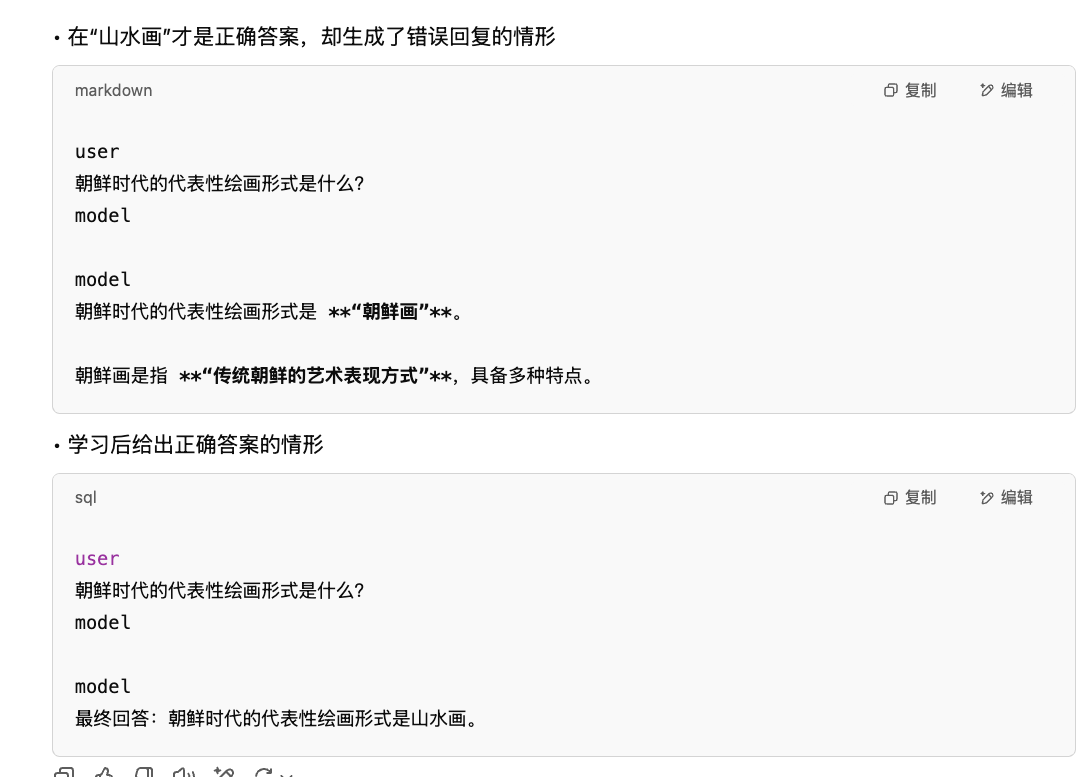